# Regresión lineal
En el siguiente archivo se va a desarrollar la regresión lineal para las combinaciones de cada una de las variables que se encuentran en los datos provistos. Los datos se pueden encontrar [acá](https://docs.google.com/spreadsheets/u/1/d/12h1Pk1ZO-BDcGldzKW-IA9VMkU9RlUOPopFoOK6stdU/pubhtml).

### Imports

In [62]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import sys  

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import statsmodels.api as sm
from statsmodels.formula.api import ols

### Read file

In [63]:
municipios = pd.read_csv("/Users/Meili/Dropbox/Uniandes/Noveno/Visual/BonoParcial/Plebiscito-Colombia-2016/Plebiscito.csv")
municipios.head()

,Municipio,Departamento,Votos para senado 2014,Porcentaje de Oscar Ivan Zuluaga (1ra vuelta),Total (1ra vuelta),Participacion (1ra vuelta),Ganador (1ra vuelta),Porcentaje de Oscar Ivan Zuluaga (2da vuelta),Total (2da vuelta),Participacion (2da vuelta),...,Votos por el Si,% Si,Votos validos,Votos totales,Cuantos salieron a votar,ind ruralidad 2014,Zonas de concentracion,Cultivos ilicitos,Hectareas de coca,Hectareas de amapola
0,Medellin,Antioquia,430064,0.3848,700732,0.4961,Zuluaga,0.6304,709359,0.5022,...,253548,0.3703,684721,694784,0.4606,0.0124,No,No,0.00,0.00
1,Abejorral,Antioquia,4135,0.6252,4827,0.3231,Zuluaga,0.7854,6748,0.4517,...,1296,0.3811,3401,3647,0.2388,0.6576,No,No,0.00,0.00
2,Abriaqui,Antioquia,726,0.4076,709,0.3726,Zuluaga,0.6033,852,0.4477,...,213,0.3908,545,572,0.2951,0.6487,No,No,0.00,0.00
3,Alejandria,Antioquia,1675,0.2919,1720,0.3930,Santos,0.4434,2163,0.4942,...,966,0.5812,1662,1735,0.3791,0.4809,No,No,0.00,0.00
4,Amaga,Antioquia,5742,0.3336,7407,0.3545,Zuluaga,0.5328,8814,0.4219,...,2084,0.3349,6223,6370,0.2892,0.4362,No,No,0.00,0.00


### Scaterplot

KeyError: '% Si'

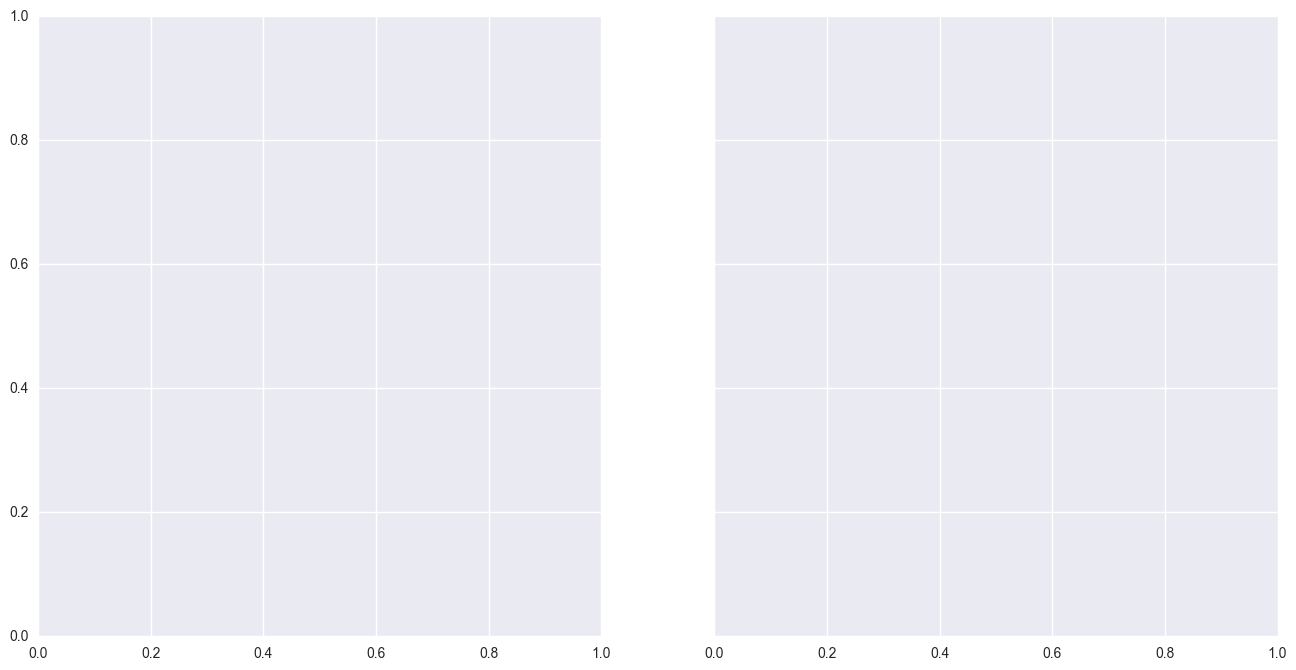

In [66]:
fig, axs = plt.subplots(1, 2, sharey=True)
municipios.plot(kind='scatter', x='Porcentaje de Oscar Ivan Zuluaga (1ra vuelta)', y='% Si', ax=axs[0], figsize=(16, 8))
municipios.plot(kind='scatter', x='Porcentaje de Oscar Ivan Zuluaga (1ra vuelta)', y='% No', ax=axs[1])

### Regresion

In [52]:
n= len(municipios['Total-1ra-vuelta'])
x=np.array(municipios['Total-1ra-vuelta'])
y=np.array(municipios['Votos-por-el-No'])
sumx= float(sum(x))
sumy= float(sum(y))
sumx2= float(sum(x*x))
sumy2= float(sum(y*y))
sumxy= float(sum(x*y))
promx= float(sumx/n)
promy= float(sumy/n)

In [53]:
m =float(sumx*sumy - n*sumxy)/float((sumx**2-n*sumx2))

b= float(promy - m*promx)

m,b

(0.46246427513094834, 297.6022867569336)

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 18: ordinal not in range(128)

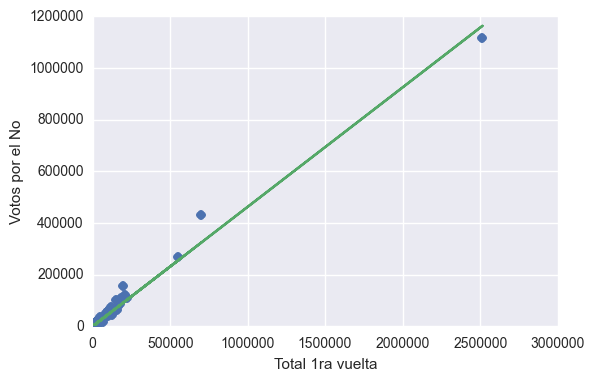

In [57]:
##Graficando

plt.plot(x,y,'o', label='Datos')
plt.plot(x, m*x + b, label='Ajuste')
plt.xlabel('Total 1ra vuelta')
plt.ylabel('Votos por el No')
plt.title('Mi primera Regresión')
plt.grid()
plt.legend(loc=4)
plt.show()

In [55]:
#Coeficiente de determinación

sigmax=np.sqrt(sumx2/n - promx**2)

sigmay=np.sqrt(sumy2/n - promy**2)

sigmaxy=sumxy/n - promx*promy

R2= (sigmaxy/(sigmax*sigmay))**2

R2

0.98505137725367287